# Data Preprocessing - NetMob25 Dataset

This notebook demonstrates basic data Preprocessing for the NetMob25 dataset.

In [1]:
import sys
sys.path.append('..')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ml_mobility_ns3 import NetMob25Loader

from ml_mobility_ns3.utils.visualization import (
    plot_trajectory, plot_multiple_trajectories, create_folium_map
)

# Set style
sns.set_style('darkgrid')
sns.set_palette('husl')

## Load Data

In [2]:
# Initialize data loader
# Use fake data if available, otherwise update path to real NetMob25 data
data_dir = Path("../data/netmob25")  # or Path("../data/netmob25") for real data
if not data_dir.exists():
    print("Data not found! Run 'python generate_fake_data.py' to create fake data.")
    data_dir = Path("../data/netmob25")  # Fallback to real data path

loader = NetMob25Loader(data_dir)
# Load datasets
individuals = loader.load_individuals()
trips = loader.load_trips()

print(f"Loaded {len(individuals)} individuals")
print(f"Loaded {len(trips)} trips")

Loaded 3320 individuals
Loaded 80697 trips


In [3]:
trips.shape

(80697, 27)

In [4]:
trips.columns

Index(['KEY', 'ID', 'Day_EMG', 'Date_EMG', 'Day_Type', 'ID_Trip_Days',
       'Type_Trip_OD', 'Area_O', 'Area_D', 'Code_INSEE_O', 'Code_INSEE_D',
       'Zone_O', 'Zone_D', 'Date_O', 'Time_O', 'Date_D', 'Time_D', 'Duration',
       'Purpose_O', 'Purpose_D', 'Main_Mode', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Weight_Day'],
      dtype='object')

In [5]:
individuals.columns

Index(['ID', 'CODGEO', 'AREA_NAME', 'SEX', 'AGE', 'DIPLOMA', 'PRO_CAT',
       'TYPE_HOUSE', 'NBPERS_HOUSE', 'NB_10', 'NB_11_17', 'NB_18_24',
       'NB_25_64', 'NB_65', 'PMR', 'DRIVING_LICENCE', 'NB_CAR', 'TWO_WHEELER',
       'BIKE', 'ELECT_SCOOTER', 'NAVIGO_SUB', 'IMAGINER_SUB', 'OTHER_SUB_PT',
       'BIKE_SUB', 'NSM_SUB', 'WEIGHT_INDIV', 'GPS_RECORD'],
      dtype='object')

In [6]:
### trips

In [7]:
trips

,KEY,ID,Day_EMG,Date_EMG,Day_Type,ID_Trip_Days,Type_Trip_OD,Area_O,Area_D,Code_INSEE_O,...,Duration,Purpose_O,Purpose_D,Main_Mode,Mode_1,Mode_2,Mode_3,Mode_4,Mode_5,Weight_Day
0,42_0001-monday-44851-PDD,42_0001,monday,2022-10-17,Normal,No_Trip,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.171946
1,42_0001-tuesday-44852-1,42_0001,tuesday,2022-10-18,Strike,1,Internal,SAVIGNY-SUR-ORGE,SAINT-MAUR-DES-FOSSES,91589,...,72.0,DEPART_HOME,OTHER,PRIV_CAR_PASSENGER,PRIV_CAR_PASSENGER,NaN,NaN,NaN,NaN,92.090337
2,42_0001-tuesday-44852-2,42_0001,tuesday,2022-10-18,Strike,2,Internal,SAINT-MAUR-DES-FOSSES,SAINTE-GENEVIEVE-DES-BOIS,94068,...,39.0,OTHER,LEISURE,PRIV_CAR_PASSENGER,PRIV_CAR_PASSENGER,NaN,NaN,NaN,NaN,92.090337
3,42_0001-tuesday-44852-3,42_0001,tuesday,2022-10-18,Strike,3,Internal,SAINTE-GENEVIEVE-DES-BOIS,EPINAY-SUR-ORGE,91549,...,17.0,LEISURE,PURCHASE,PRIV_CAR_PASSENGER,PRIV_CAR_PASSENGER,NaN,NaN,NaN,NaN,92.090337
4,42_0001-tuesday-44852-4,42_0001,tuesday,2022-10-18,Strike,4,Internal,EPINAY-SUR-ORGE,SAVIGNY-SUR-ORGE,91216,...,6.0,PURCHASE,RETURN_HOME,PRIV_CAR_PASSENGER,PRIV_CAR_PASSENGER,NaN,NaN,NaN,NaN,92.090337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80692,4_2386-sunday-44955-2,4_2386,sunday,2023-01-29,Normal,2,Internal,MASSY,PERTHES,91377,...,36.0,ACCOM,RETURN_HOME,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,124.509471
80693,4_2386-sunday-44955-3,4_2386,sunday,2023-01-29,Normal,3,Internal,PERTHES,MELUN,77359,...,18.0,DEPART_HOME,PURCHASE,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,124.509471
80694,4_2386-sunday-44955-4,4_2386,sunday,2023-01-29,Normal,4,Internal,MELUN,PERTHES,77288,...,21.0,PURCHASE,RETURN_HOME,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,124.509471
80695,4_2386-monday-44956-1,4_2386,monday,2023-01-30,Normal,1,Internal,PERTHES,FONTAINEBLEAU,77359,...,20.0,DEPART_HOME,STUDIES,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,121.119931


<Axes: xlabel='Day_EMG', ylabel='count'>

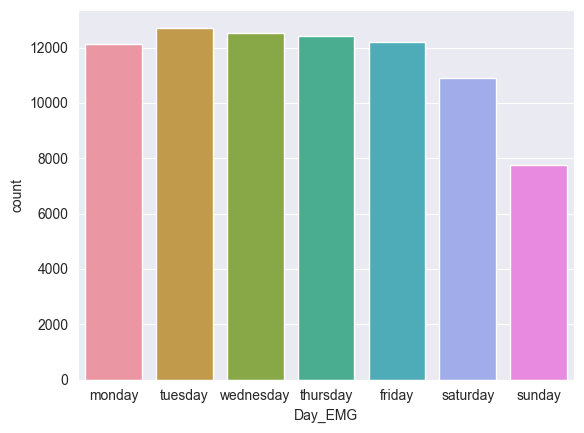

In [8]:
sns.countplot(trips, x="Day_EMG")

<Axes: xlabel='Day_Type', ylabel='count'>

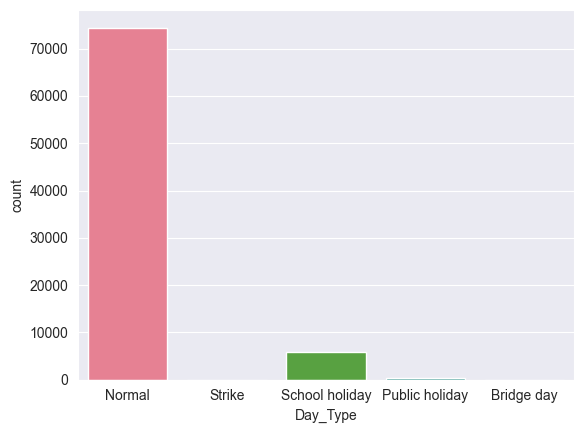

In [9]:
sns.countplot(trips, x="Day_Type")

In [10]:
trips["Area_O"].unique()

array([nan, 'SAVIGNY-SUR-ORGE', 'SAINT-MAUR-DES-FOSSES', ..., 'vincennes',
       'RUILLE-SUR-LOIR', 'SAINT-CYR-SUR-MORIN'], dtype=object)

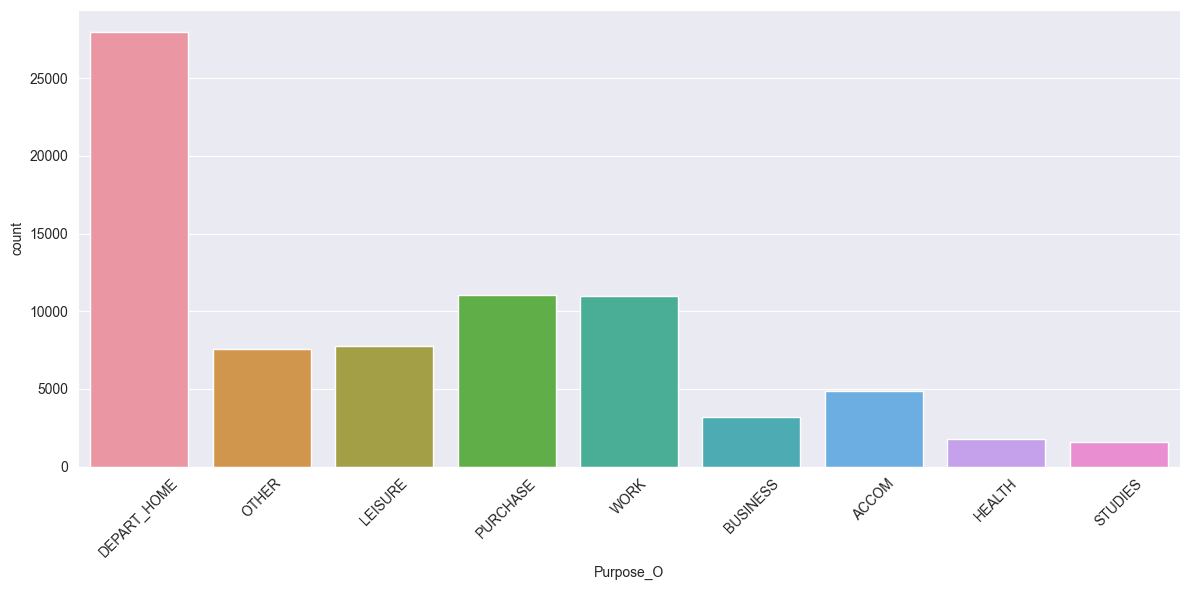

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(trips, x="Purpose_O")
plt.xticks(rotation=45)  # or rotation=90 for vertical
plt.tight_layout()

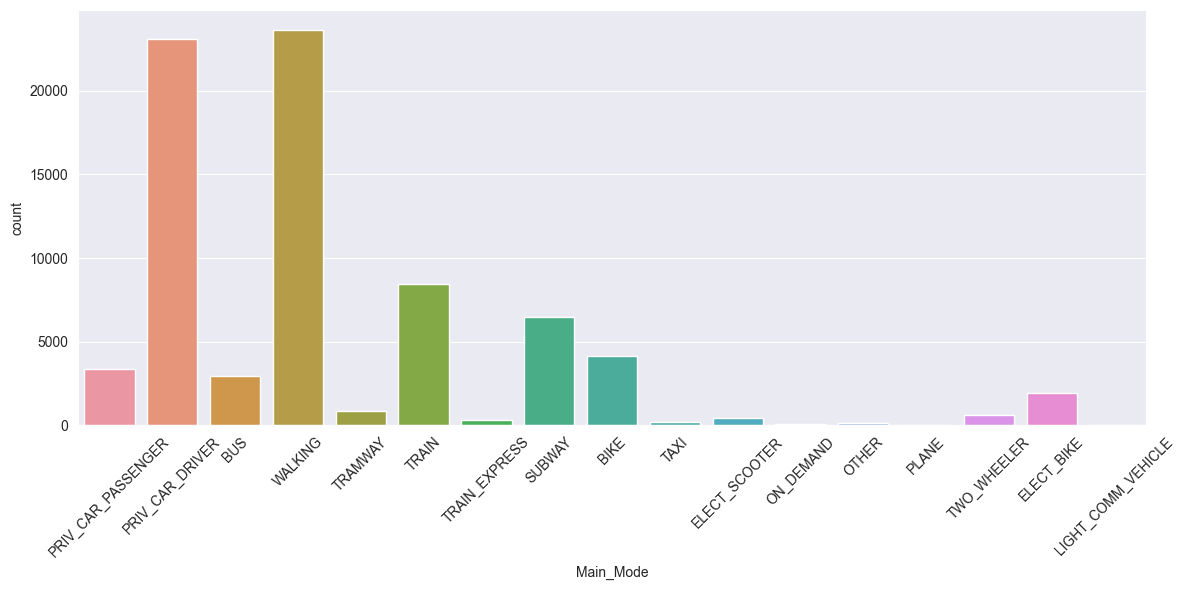

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(trips, x="Main_Mode")
plt.xticks(rotation=45)  # or rotation=90 for vertical
plt.tight_layout()

In [13]:
trips["Main_Mode"].unique()

array([nan, 'PRIV_CAR_PASSENGER', 'PRIV_CAR_DRIVER', 'BUS', 'WALKING',
       'TRAMWAY', 'TRAIN', 'TRAIN_EXPRESS', 'SUBWAY', 'BIKE', 'TAXI',
       'ELECT_SCOOTER', 'ON_DEMAND', 'OTHER', 'PLANE', 'TWO_WHEELER',
       'ELECT_BIKE', 'LIGHT_COMM_VEHICLE'], dtype=object)

In [14]:
remove 

NameError: name 'remove' is not defined

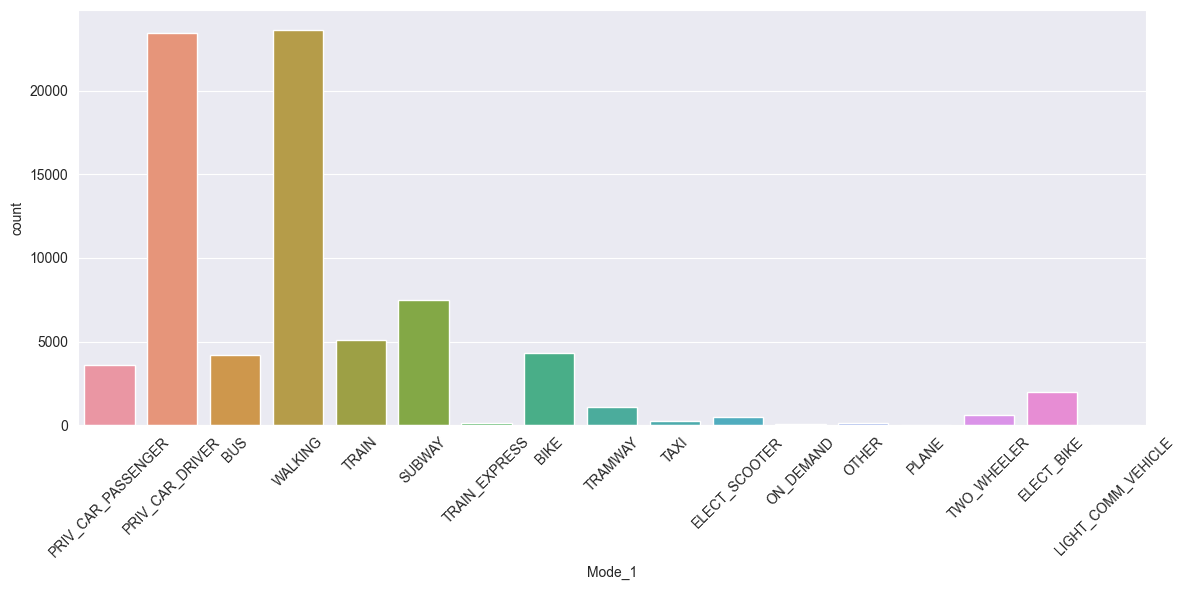

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(trips, x="Mode_1")
plt.xticks(rotation=45)  # or rotation=90 for vertical
plt.tight_layout()

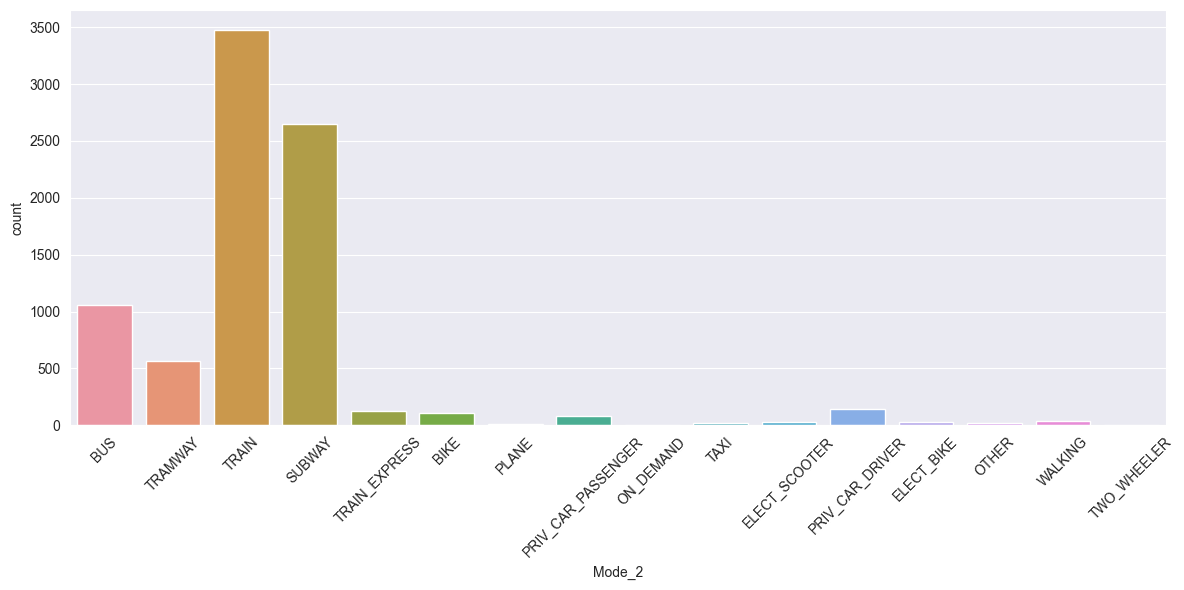

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(trips, x="Mode_2")
plt.xticks(rotation=45)  # or rotation=90 for vertical
plt.tight_layout()

In [17]:
trips[trips['Mode_1'].isnull()]['Mode_2'].notnull().sum()

62

In [18]:
(trips['Main_Mode'] == trips['Mode_2']).sum()

4991

/Users/raphaelcousin/Library/Caches/pypoetry/virtualenvs/ml-mobility-ns3-nuqJhA4m-py3.13/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


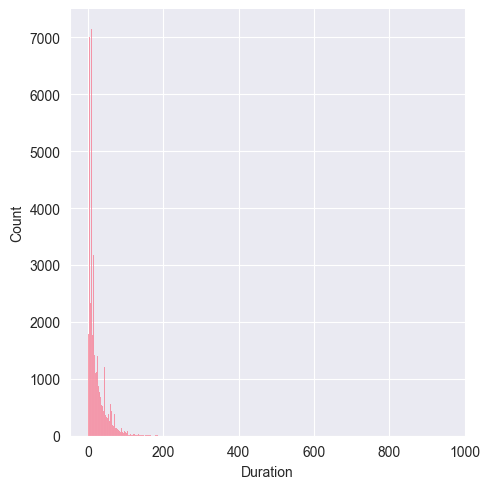

In [19]:
sns.displot(trips, x="Duration")

/Users/raphaelcousin/Library/Caches/pypoetry/virtualenvs/ml-mobility-ns3-nuqJhA4m-py3.13/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


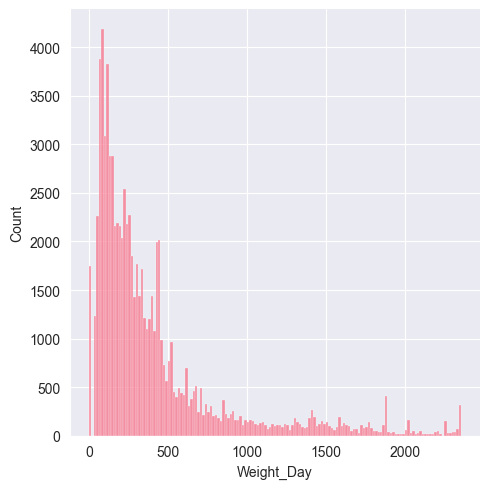

In [20]:
sns.displot(trips, x="Weight_Day")

In [21]:
### gps

In [22]:
    def load_gps_trace(user_id: str) -> pd.DataFrame:
        """Load GPS trace for a specific user."""
        path = data_dir / "gps_dataset" / f"{user_id}.csv"
        if not path.exists():
            logger.warning(f"GPS file not found for user {user_id}")
            return pd.DataFrame()
        
        df = pd.read_csv(path)
        df['UTC DATETIME'] = pd.to_datetime(df['UTC DATETIME'])
        return df

In [23]:

path = "../data/netmob25/gps_dataset/2_1789.csv"

gps = pd.read_csv(path)

In [24]:
gps.columns

Index(['UTC DATETIME', 'LOCAL DATETIME', 'VALID', 'LATITUDE', 'LONGITUDE',
       'SPEED'],
      dtype='object')

In [25]:
trips.columns

Index(['KEY', 'ID', 'Day_EMG', 'Date_EMG', 'Day_Type', 'ID_Trip_Days',
       'Type_Trip_OD', 'Area_O', 'Area_D', 'Code_INSEE_O', 'Code_INSEE_D',
       'Zone_O', 'Zone_D', 'Date_O', 'Time_O', 'Date_D', 'Time_D', 'Duration',
       'Purpose_O', 'Purpose_D', 'Main_Mode', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Weight_Day'],
      dtype='object')

In [26]:
trips[['Date_O', 'Time_O']].isnull().sum()

Date_O    3979
Time_O    4001
dtype: int64

In [27]:
trips[['Date_D', 'Time_D']].isnull().sum()

Date_D    3979
Time_D    4009
dtype: int64

In [28]:
trips = trips[trips[['Date_O', 'Time_O']].notnull().all(axis=1)]
trips = trips[trips[['Date_D', 'Time_D']].notnull().all(axis=1)]

In [29]:
import pandas as pd
import numpy as np
import glob
import os
from math import radians, cos, sin, asin, sqrt
from tqdm import tqdm

def get_gps_trips(individuals, trips):

    
    path = "../data/netmob25/gps_dataset"
    files = glob.glob(f"{path}/*.csv")
    
    # Create a copy of trips to avoid modifying the original
    trips_with_gps = trips.copy()
    
    # Initialize the GPS data column
    trips_with_gps['gps_data'] = None
    
    # Create a dictionary of available GPS files for quick lookup
    available_files = {}
    for file in files:
        # Extract participant ID from filename (e.g., "10_2978.csv" -> "10_2978")
        participant_id = os.path.basename(file).replace('.csv', '')
        available_files[participant_id] = file
    
    print(f"Found {len(available_files)} GPS files")
    print(f"Processing {len(trips)} trips...")
    
    # Process each trip
    processed_count = 0
    for idx, trip in tqdm(trips_with_gps.iterrows(), total=len(trips_with_gps)):
        participant_id = str(trip['ID'])
        
        # Check if GPS file exists for this participant
        if participant_id in available_files:
            try:
                # Load GPS data for this participant
                gps_data = pd.read_csv(available_files[participant_id])
                
                # Create trip time window
                start_time = f"{trip['Date_O']} {trip['Time_O']}"
                end_time = f"{trip['Date_D']} {trip['Time_D']}"
                
                # Convert to datetime for comparison
                start_dt = pd.to_datetime(start_time, format='%Y-%m-%d %H:%M:%S')
                end_dt = pd.to_datetime(end_time, format='%Y-%m-%d %H:%M:%S')
                
                # Convert GPS timestamps to datetime
                gps_data['LOCAL_DATETIME_parsed'] = pd.to_datetime(gps_data['LOCAL DATETIME'], format='%Y-%m-%d %H:%M:%S')
                
                # Filter GPS points for this trip
                trip_gps = gps_data[
                    (gps_data['LOCAL_DATETIME_parsed'] >= start_dt) & 
                    (gps_data['LOCAL_DATETIME_parsed'] <= end_dt)
                ].copy()
                
                # Only store if we have GPS points for this trip
                if len(trip_gps) > 0:
                    trips_with_gps.at[idx, 'gps_data'] = trip_gps
                    processed_count += 1
                else:
                    trips_with_gps.at[idx, 'gps_data'] = None
                
            except Exception as e:
                print(f"Error processing GPS for participant {participant_id}, trip {trip['KEY']}: {e}")
                trips_with_gps.at[idx, 'gps_data'] = None
        else:
            trips_with_gps.at[idx, 'gps_data'] = None
    
    print(f"Successfully processed GPS data for {processed_count} trips")
    return trips_with_gps


In [30]:
trips_with_gps['gps_data'].notnull().sum()

NameError: name 'trips_with_gps' is not defined

In [31]:
trips_with_gps = trips_with_gps[trips_with_gps['gps_data'].notnull()]['gps_data'].apply(lambda x: x.values)

NameError: name 'trips_with_gps' is not defined

In [32]:
gps_data = trips_with_gps

NameError: name 'trips_with_gps' is not defined

In [33]:
trips['gps_data'] = gps_data

NameError: name 'gps_data' is not defined

In [34]:
trips['gps_data']

KeyError: 'gps_data'

In [ ]:
trips_with_gps = trips.copy()

In [35]:
trips_with_gps.to_csv('../data_preprocess/trip_with_gps.csv', index=False)

NameError: name 'trips_with_gps' is not defined

In [36]:
test = pd.read_csv('../data_preprocess/trip_with_gps.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data_preprocess/trip_with_gps.csv'

In [37]:
def get_size(x):
    try:
        return len(x)
    except:
        return None


dd['seq_length'] = dd['gps_data'].apply(get_size)

NameError: name 'dd' is not defined

In [108]:
def get_min_gap_sec(x):
    try:
        if x is None or len(x) < 2:
            return None
        x_copy = x.copy()
        time_diffs = x_copy['LOCAL_DATETIME_parsed'].sort_values().diff().dropna()
        return time_diffs.min().total_seconds()
    except:
        return None

def get_max_gap_sec(x):
    try:
        if x is None or len(x) < 2:
            return None
        x_copy = x.copy()
        time_diffs = x_copy['LOCAL_DATETIME_parsed'].sort_values().diff().dropna()
        return time_diffs.max().total_seconds()
    except:
        return None

def get_avg_gap_sec(x):
    try:
        if x is None or len(x) < 2:
            return None
        x_copy = x.copy()
        time_diffs = x_copy['LOCAL_DATETIME_parsed'].sort_values().diff().dropna()
        return time_diffs.mean().total_seconds()
    except:
        return None

# Usage:
dd['min_gap_sec'] = dd['gps_data'].apply(get_min_gap_sec)
dd['max_gap_sec'] = dd['gps_data'].apply(get_max_gap_sec) 
dd['avg_gap_sec'] = dd['gps_data'].apply(get_avg_gap_sec)

/var/folders/n1/bdjyqqwn5t5cglz8mdg_13900000gn/T/ipykernel_21270/475697891.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['min_gap_sec'] = dd['gps_data'].apply(get_min_gap_sec)
/var/folders/n1/bdjyqqwn5t5cglz8mdg_13900000gn/T/ipykernel_21270/475697891.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['max_gap_sec'] = dd['gps_data'].apply(get_max_gap_sec)
/var/folders/n1/bdjyqqwn5t5cglz8mdg_13900000gn/T/ipykernel_21270/475697891.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

In [118]:
dd['max_gap_sec'].quantile(0.90)

191.0

In [ ]:
gps_data_len

/Users/raphaelcousin/Library/Caches/pypoetry/virtualenvs/ml-mobility-ns3-nuqJhA4m-py3.13/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

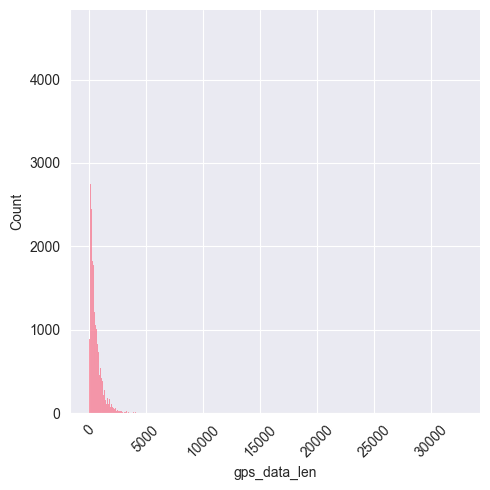

In [71]:
plt.figure(figsize=(12, 6))
sns.displot(dd[dd['gps_data_len'] != -1], x="gps_data_len")
plt.xticks(rotation=45)  # or rotation=90 for vertical
plt.tight_layout()

In [73]:
(dd['gps_data_len'] > 2000).sum()

2359

In [83]:
dd['Weight_Day'].sum()

28528990.230341546

In [89]:
dd['gps_data_len'].quantile(0.97)

2108.1300000000047

In [87]:
dd[dd['gps_data_len'] < dd['gps_data_len'].quantile(0.97)]['Weight_Day'].sum()

27574536.079725392

In [88]:
26968889 / 27574536

0.9780360039421878

/Users/raphaelcousin/Library/Caches/pypoetry/virtualenvs/ml-mobility-ns3-nuqJhA4m-py3.13/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

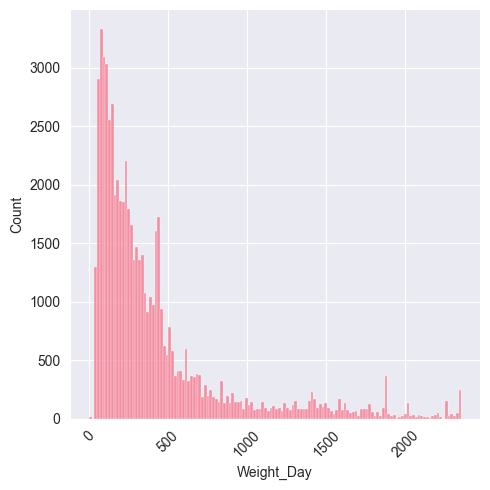

In [79]:
plt.figure(figsize=(12, 6))
sns.displot(dd[dd['gps_data_len'] != -1], x="Weight_Day")
plt.xticks(rotation=45)  # or rotation=90 for vertical
plt.tight_layout()

In [68]:
dd[dd['gps_data_len'] != -1]['gps_data_len']

,KEY,ID,Day_EMG,Date_EMG,Day_Type,ID_Trip_Days,Type_Trip_OD,Area_O,Area_D,Code_INSEE_O,...,Purpose_D,Main_Mode,Mode_1,Mode_2,Mode_3,Mode_4,Mode_5,Weight_Day,gps_data,gps_data_len
1,42_0001-tuesday-44852-1,42_0001,tuesday,2022-10-18,Strike,1,Internal,SAVIGNY-SUR-ORGE,SAINT-MAUR-DES-FOSSES,91589,...,OTHER,PRIV_CAR_PASSENGER,PRIV_CAR_PASSENGER,NaN,NaN,NaN,NaN,92.090337,UTC DATETIME LOCAL DATETIME...,4262
2,42_0001-tuesday-44852-2,42_0001,tuesday,2022-10-18,Strike,2,Internal,SAINT-MAUR-DES-FOSSES,SAINTE-GENEVIEVE-DES-BOIS,94068,...,LEISURE,PRIV_CAR_PASSENGER,PRIV_CAR_PASSENGER,NaN,NaN,NaN,NaN,92.090337,UTC DATETIME LOCAL DATETIME...,2300
3,42_0001-tuesday-44852-3,42_0001,tuesday,2022-10-18,Strike,3,Internal,SAINTE-GENEVIEVE-DES-BOIS,EPINAY-SUR-ORGE,91549,...,PURCHASE,PRIV_CAR_PASSENGER,PRIV_CAR_PASSENGER,NaN,NaN,NaN,NaN,92.090337,UTC DATETIME LOCAL DATETIME...,1019
4,42_0001-tuesday-44852-4,42_0001,tuesday,2022-10-18,Strike,4,Internal,EPINAY-SUR-ORGE,SAVIGNY-SUR-ORGE,91216,...,RETURN_HOME,PRIV_CAR_PASSENGER,PRIV_CAR_PASSENGER,NaN,NaN,NaN,NaN,92.090337,UTC DATETIME LOCAL DATETIME...,361
9,42_0001-thursday-44854-1,42_0001,thursday,2022-10-20,Normal,1,Internal,SAVIGNY-SUR-ORGE,EVRY,91589,...,WORK,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,91.123891,UTC DATETIME LOCAL DATETIME...,1081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80692,4_2386-sunday-44955-2,4_2386,sunday,2023-01-29,Normal,2,Internal,MASSY,PERTHES,91377,...,RETURN_HOME,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,124.509471,UTC DATETIME LOCAL DATETIM...,1075
80693,4_2386-sunday-44955-3,4_2386,sunday,2023-01-29,Normal,3,Internal,PERTHES,MELUN,77359,...,PURCHASE,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,124.509471,UTC DATETIME LOCAL DATETIM...,540
80694,4_2386-sunday-44955-4,4_2386,sunday,2023-01-29,Normal,4,Internal,MELUN,PERTHES,77288,...,RETURN_HOME,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,124.509471,UTC DATETIME LOCAL DATETIM...,631
80695,4_2386-monday-44956-1,4_2386,monday,2023-01-30,Normal,1,Internal,PERTHES,FONTAINEBLEAU,77359,...,STUDIES,PRIV_CAR_DRIVER,PRIV_CAR_DRIVER,NaN,NaN,NaN,NaN,121.119931,UTC DATETIME LOCAL DATETIM...,600


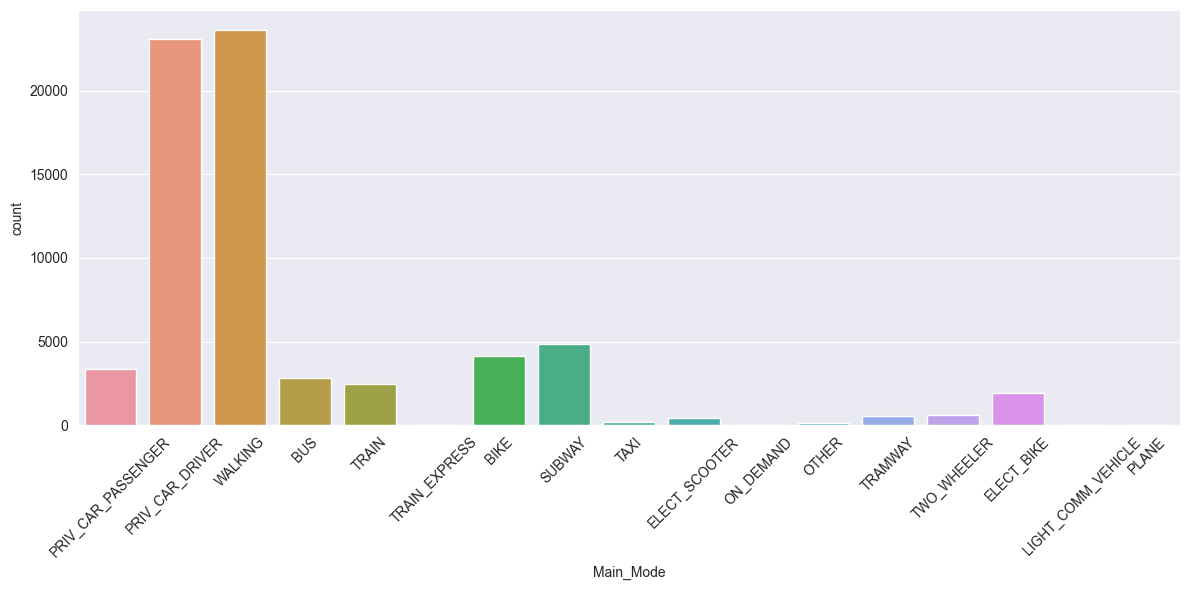

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(dd, x="Main_Mode")
plt.xticks(rotation=45)  # or rotation=90 for vertical
plt.tight_layout()

In [3]:
trips_with_gps

NameError: name 'trips_with_gps' is not defined

In [91]:
trips_with_gps['Mode_2'].notnull().sum()

8337

In [94]:
dd['gps_data'][1]

,UTC DATETIME,LOCAL DATETIME,VALID,LATITUDE,LONGITUDE,SPEED,LOCAL_DATETIME_parsed
0,2022-10-18 05:29:00,2022-10-18 07:29:00,SPS,48.687476,2.332161,0.016,2022-10-18 07:29:00
1,2022-10-18 05:29:01,2022-10-18 07:29:01,SPS,48.687476,2.332161,0.115,2022-10-18 07:29:01
2,2022-10-18 05:29:02,2022-10-18 07:29:02,SPS,48.687476,2.332161,0.034,2022-10-18 07:29:02
3,2022-10-18 05:29:03,2022-10-18 07:29:03,SPS,48.687476,2.332161,0.027,2022-10-18 07:29:03
4,2022-10-18 05:29:04,2022-10-18 07:29:04,SPS,48.687476,2.332161,0.058,2022-10-18 07:29:04
...,...,...,...,...,...,...,...
4257,2022-10-18 06:40:56,2022-10-18 08:40:56,DGPS,48.802172,2.486909,23.506,2022-10-18 08:40:56
4258,2022-10-18 06:40:57,2022-10-18 08:40:57,DGPS,48.802172,2.486909,23.759,2022-10-18 08:40:57
4259,2022-10-18 06:40:58,2022-10-18 08:40:58,DGPS,48.802172,2.486909,24.085,2022-10-18 08:40:58
4260,2022-10-18 06:40:59,2022-10-18 08:40:59,DGPS,48.802172,2.486909,23.316,2022-10-18 08:40:59
